# Manas Dhanuka; Homework 2

## Problem 1

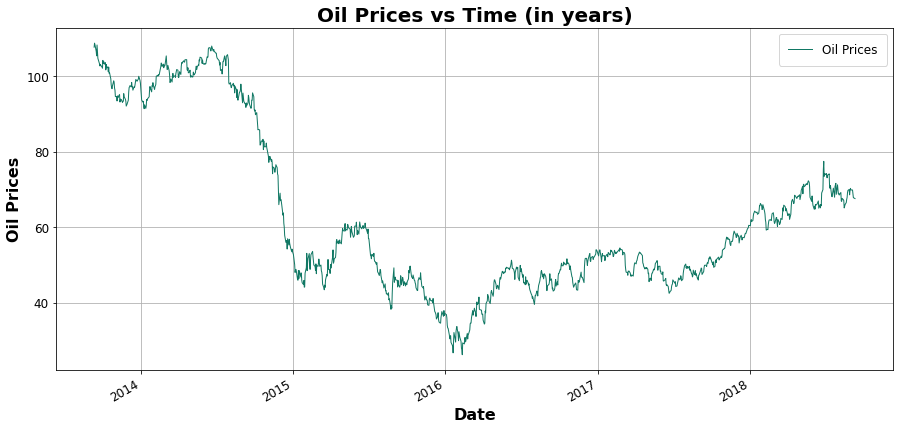

In [16]:
#importing the required libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as datetime
import pandas as pd

#create a dataframe and parsing the date column as dates
oil_data = pd.read_csv('oil_price.csv',index_col=0,parse_dates=True)

#cleaning the data by removing the rows with '.' instead of actual data 
index_names = oil_data[ oil_data['DCOILWTICO'] == '.' ].index
oil_data.drop(index_names, inplace = True)

#converting column values to floats from object type
oil_data['DCOILWTICO'] = oil_data['DCOILWTICO'].astype(float)

#ploting the data
oil_data.plot(figsize=(15,7),use_index='TRUE',grid='TRUE', fontsize = 12, color = '#117864', linewidth =1)
plt.legend(['Oil Prices'], fontsize = 'large', borderpad = 0.8)
plt.title('Oil Prices vs Time (in years)', fontsize =20, fontweight = 'bold')
plt.ylabel('Oil Prices', fontsize =16, fontweight = 'bold')
plt.xlabel('Date', fontsize =16, fontweight = 'bold')
plt.show()

## Problem 2

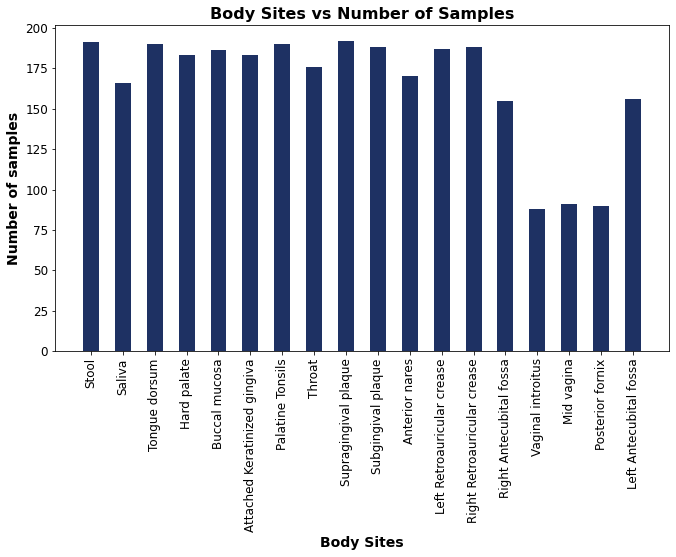

In [2]:
import matplotlib.pyplot as plt

#object created to open file in read mode 
HMBP_content = open('v13_map_uniquebyPSN.txt', 'r')
#storing the data in a list
all_data = []
for line in HMBP_content:
    #removing the tabs and spaces
    all_data.append(line.strip().split("\t"))

#Creating empty dictionary to store body sites as keys and number of samples as values
sample_id = {}

#Remove undersocres from body sites
for i1 in range(1,len(all_data)):
    scoreless = all_data[i1][5].replace('_',' ')
    all_data[i1][5]=scoreless

#Looping over the data to store the diffirent body parts as keys in the dictionary
for i1 in range(1,len(all_data)):
    if all_data[i1][5] not in sample_id:
        sample_id[all_data[i1][5]] = []

#Matching the values to keys in the data set, to get a dictionary with keys and list of ID numbers as the corresponding values
for key in sample_id:
    for i1 in range(1,len(all_data)):
        if all_data[i1][5] == key:
            sample_id[key].append(all_data[i1][0])

#Creating Dictionary to store number of samples for each body site
sample_id_freq = {}
#Storing numbr of samples for a particular body site in a dictionary
for keys in sample_id:
    sample_id_freq[keys]= len(sample_id[keys])

b_sites=sample_id_freq.keys()
samplenums= sample_id_freq.values()

#Plotting the data
plt.figure(figsize=(11,6))
plt.title('Body Sites vs Number of Samples', fontsize =16, fontweight = 'bold')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel('Number of samples',fontsize =14, fontweight = 'bold')
plt.xlabel('Body Sites',fontsize =14, fontweight = 'bold' )
plt.bar(b_sites,samplenums, width=0.5, color='#1E3163')  
plt.show()

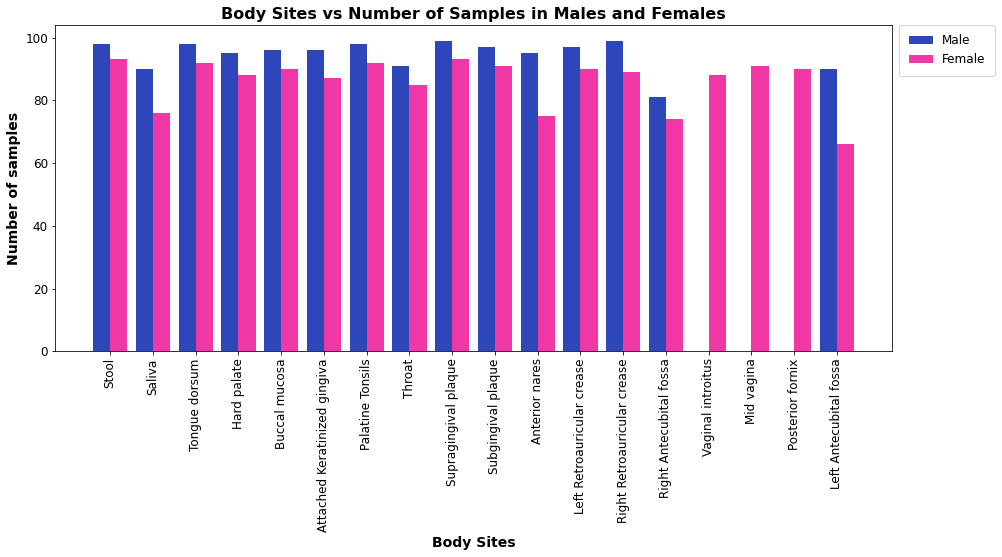

In [2]:
import numpy as np

bsites = [] #list of all body sites

#Parsing the data to append in the list
for i1 in range(1,len(all_data)):
    if all_data[i1][5] not in bsites:
        bsites.append(all_data[i1][5])

countm=0 #counter for male samples
countf=0 #counter for female samples
count_m=[] #list of frequency of males
count_f=[] #list of frequency of females

#Loop to count the sample number for males and femals and storing them in diffirent list
for bs in bsites:
    for i in range(1,len(all_data)):
        if all_data[i][5] == bs and all_data[i][3]=='male':
            countm = countm + 1
    
        if all_data[i][5] == bs and all_data[i][3]=='female':
            countf = countf + 1
    
    count_m.append(countm)
    count_f.append(countf)
    countm=0
    countf=0

width = 0.4
x = np.arange(len(count_m))

#Plotting the data
plt.figure(figsize=(15,6))
plt.ylabel('Number of samples',fontsize =14, fontweight = 'bold')
plt.xlabel('Body Sites',fontsize =14, fontweight = 'bold')
plt.title('Body Sites vs Number of Samples in Males and Females', fontsize =16, fontweight = 'bold')
plt.xticks(x,bsites,rotation=90, fontsize = 12)
plt.yticks( fontsize =12)
plt.bar(x - 0.2, count_m , width, color='#2D46B9')
plt.bar(x + 0.2, count_f ,width, color ='#F037A5')
plt.legend(['Male',"Female"], fontsize = 12, borderpad =0.8, bbox_to_anchor=(1.001,1.02))  
plt.show()

## Problem 3

In [6]:
#Opening the fasta file and storing it as a string
fasta_file = open('ecoligenome.fasta','r')
data = fasta_file.readlines()
egenome = "".join(data[1:])

In [7]:
import random

def rand_gen():
    '''This function generates random starting points '''
    rand_start = random.randrange(0,len(egenome)-20000)
    return rand_start

def walk_generator(start,n):
    '''This function takes in the the lenght of the random walk and the uses the above scheme of 
    ’A’ and ’T’ corresponding to a forward step Δx = +1 while ’C’ and ’G’ to a backward step Δx = −1.
    It returns a list containing the postion after reading each nucleotide one by one.
    '''
    positions = [0] 
    x=0
    for nt in range(start,start + n):
        if egenome[nt] == 'A' or egenome[nt] == 'T':
            x += 1
        elif egenome[nt] == 'G' or egenome[nt] == 'C':
            x -= 1
        positions.append(x) 
    return positions

def displacement_calc(pos_list,n):
    '''Function takes in a list containg positions of the random walk as well as length of the individual 
    walks for which the displacement is needed. Then calculets the displacements and returns a list with the 
    displacements for walks of specified length. 
    '''
    disp_list = []
    for x in range(0,len(pos_list)-n,n):
        displacement = pos_list[x+n] - pos_list[x]
        disp_list.append(displacement)
    return disp_list

In [14]:
#Function calls
list_of_pos = walk_generator(rand_gen(),20001)
list_of_disp = displacement_calc(list_of_pos,100)

walk_1 = walk_generator(rand_gen(),100)
walk_2 = walk_generator(rand_gen(),100)
walk_3 = walk_generator(rand_gen(),100)

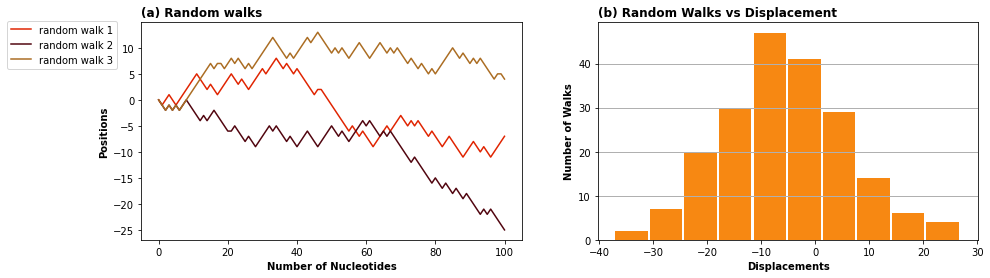

In [15]:
plt.rcParams['figure.figsize'] = [15, 4]

#Plot (a)
plt.subplot(1, 2, 1)
plt.title('(a) Random walks', fontweight='bold', fontsize=12, loc = 'left')
plt.xlabel('Number of Nucleotides', fontweight='bold', fontsize=10)
plt.ylabel('Positions', fontweight='bold', fontsize=10)
plt.plot(walk_1, color='#E02401')
plt.plot(walk_2, color='#51050F')
plt.plot(walk_3, color = '#AB6D23')
label = [] # for creating the legend
for i in range(3): 
    label.append('random walk ' + str(i+1)) # add 1 so the first walk is walk 1 and not 0
plt.legend(labels=label, bbox_to_anchor=(-0.05, 1.03), fontsize=10) # add legend

#Plot (b)
plt.subplot(1, 2, 2)
plt.xlabel('Displacements', fontweight='bold', fontsize=10)
plt.ylabel('Number of Walks', fontweight='bold', fontsize=10)
plt.title('(b) Random Walks vs Displacement', fontweight='bold', fontsize=12, loc ='left')
plt.grid(axis ='y', linewidth = 1)
plt.hist(list_of_disp, width = 6, color = '#F78812')
plt.show()